In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!ls

images	kaggle.json  pokemon.csv  pokemon-images-and-types.zip	sample_data


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download vishalsubbiah/pokemon-images-and-types

pokemon-images-and-types.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip pokemon-images-and-types.zip n

Archive:  pokemon-images-and-types.zip
caution: filename not matched:  n


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import tensorflow as tf



In [ ]:
df = pd.read_csv('./pokemon.csv')
df.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [ ]:
df2 = df.sort_values(by = ["Name"], ascending = True).reset_index(drop = True)
df2.head()

,Name,Type1,Type2
0,abomasnow,Grass,Ice
1,abra,Psychic,NaN
2,absol,Dark,NaN
3,accelgor,Bug,NaN
4,aegislash-blade,Steel,Ghost


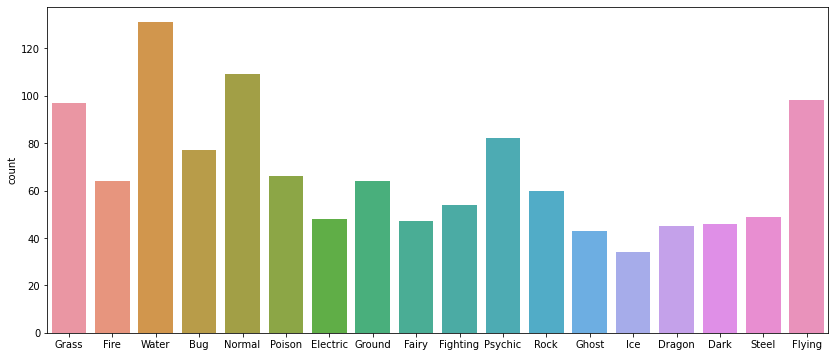

In [ ]:
type1 = df["Type1"].tolist() # dataframe to list
type2 = df["Type2"].tolist()

typo = type1 + type2
plt.figure(figsize = (14,6))

sns.countplot(x=typo) #

In [ ]:
print(type1)

print(type2)

['Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire', 'Water', 'Water', 'Water', 'Bug', 'Bug', 'Bug', 'Bug', 'Bug', 'Bug', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Poison', 'Poison', 'Electric', 'Electric', 'Ground', 'Ground', 'Poison', 'Poison', 'Poison', 'Poison', 'Poison', 'Poison', 'Fairy', 'Fairy', 'Fire', 'Fire', 'Normal', 'Normal', 'Poison', 'Poison', 'Grass', 'Grass', 'Grass', 'Bug', 'Bug', 'Bug', 'Bug', 'Ground', 'Ground', 'Normal', 'Normal', 'Water', 'Water', 'Fighting', 'Fighting', 'Fire', 'Fire', 'Water', 'Water', 'Water', 'Psychic', 'Psychic', 'Psychic', 'Fighting', 'Fighting', 'Fighting', 'Grass', 'Grass', 'Grass', 'Water', 'Water', 'Rock', 'Rock', 'Rock', 'Fire', 'Fire', 'Water', 'Water', 'Electric', 'Electric', 'Normal', 'Normal', 'Normal', 'Water', 'Water', 'Poison', 'Poison', 'Water', 'Water', 'Ghost', 'Ghost', 'Ghost', 'Rock', 'Psychic', 'Psychic', 'Water', 'Water', 'Electric', 'Electric', 'Grass', 'Grass', 'Ground', 'Ground', 'Fighting', 

In [ ]:
x1 = df.Type1.value_counts().keys()
y1 = df.Type1.value_counts().values

x2 = df.Type2.value_counts().keys()
y2 = df.Type2.value_counts().values


print(x1,y1)
print(x2,y2)

Index(['Water', 'Normal', 'Grass', 'Bug', 'Fire', 'Psychic', 'Rock',
       'Electric', 'Poison', 'Ground', 'Dark', 'Fighting', 'Ghost', 'Dragon',
       'Steel', 'Ice', 'Fairy', 'Flying'],
      dtype='object') [114 105  78  72  53  53  46  40  34  32  29  29  27  27  26  23  18   3]
Index(['Flying', 'Poison', 'Ground', 'Fairy', 'Psychic', 'Fighting', 'Steel',
       'Grass', 'Dragon', 'Water', 'Dark', 'Ghost', 'Rock', 'Fire', 'Ice',
       'Electric', 'Bug', 'Normal'],
      dtype='object') [95 32 32 29 29 25 23 19 18 17 17 16 14 11 11  8  5  4]


In [ ]:
xy1 = pd.DataFrame({'x1':x1, 'y1':y1})
xy2 = pd.DataFrame({'x2':x2, 'y2':y2})

xy1.sort_values(by=['x1'],inplace = True)
xy2.sort_values(by=['x2'],inplace = True)

In [ ]:
xy1

,x1,y1
3,Bug,72
10,Dark,29
13,Dragon,27
7,Electric,40
16,Fairy,18
11,Fighting,29
4,Fire,53
17,Flying,3
12,Ghost,27
2,Grass,78


<BarContainer object of 18 artists>

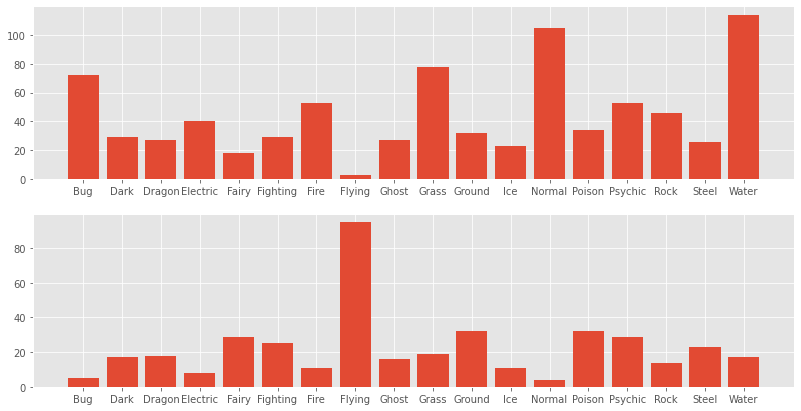

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (30,7))

gspec = gridspec.GridSpec(2,2)

tp = plt.subplot(gspec[0,1])
bt = plt.subplot(gspec[1,1:])

tp.bar(xy1.x1, xy1.y1)   #top

bt.bar(xy2.x2, xy2.y2)   #bottom

Text(0.5, 1.0, 'Pokemon Types')

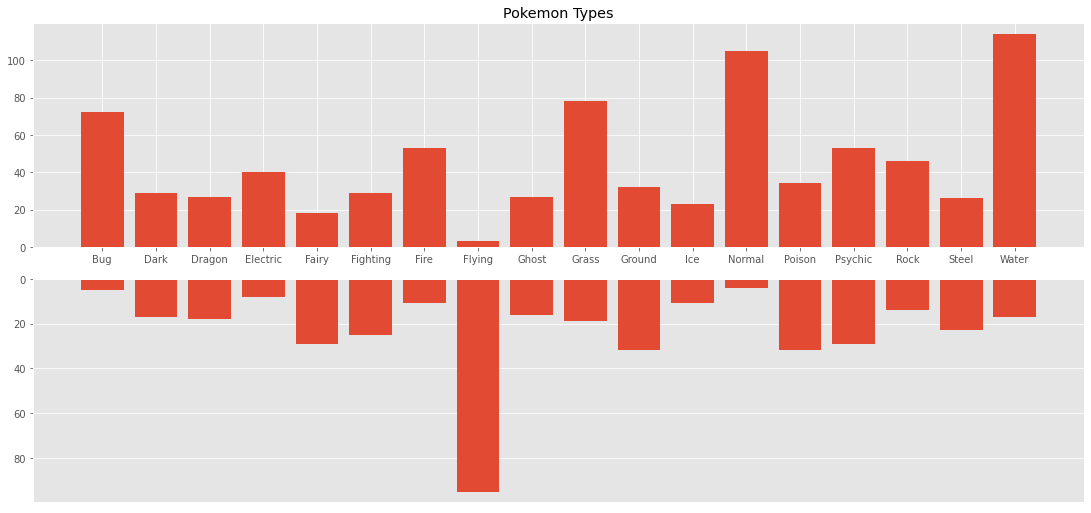

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (30,7))

gspec = gridspec.GridSpec(2,2)

tp = plt.subplot(gspec[0,1])
bt = plt.subplot(gspec[1,1:])

tp.bar(xy1.x1, xy1.y1)   #top

bt.bar(xy2.x2, xy2.y2)   #bottom

bt.invert_yaxis()
bt.set_xticks([])

plt.tight_layout()

tp.set_title('Pokemon Types')

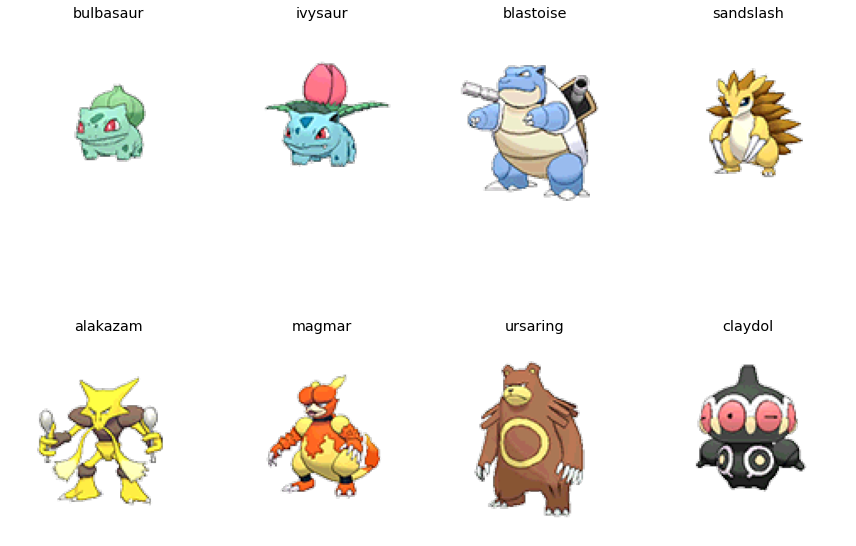

In [ ]:
path = './images/images/'

fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,figsize = (12,10))

ax = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 ]

for i in range(8):
  img = mpimg.imread(path+df['Name'][i**3]+".png")
  ax[i].imshow(img)
  ax[i].set_title(df['Name'][i**3])
  ax[i].axis('off')

plt.tight_layout()

In [ ]:
img_name = sorted(os.listdir(path))

img_paths = []

for i in img_name:
  img_paths.append(path+i)


print('img_paths', img_paths)



img_paths ['./images/images/abomasnow.png', './images/images/abra.png', './images/images/absol.png', './images/images/accelgor.png', './images/images/aegislash-blade.png', './images/images/aerodactyl.png', './images/images/aggron.png', './images/images/aipom.png', './images/images/alakazam.png', './images/images/alomomola.png', './images/images/altaria.png', './images/images/amaura.png', './images/images/ambipom.png', './images/images/amoonguss.png', './images/images/ampharos.png', './images/images/anorith.png', './images/images/araquanid.jpg', './images/images/arbok.png', './images/images/arcanine.png', './images/images/arceus.png', './images/images/archen.png', './images/images/archeops.png', './images/images/ariados.png', './images/images/armaldo.png', './images/images/aromatisse.png', './images/images/aron.png', './images/images/articuno.png', './images/images/audino.png', './images/images/aurorus.png', './images/images/avalugg.png', './images/images/axew.png', './images/images/aze

In [ ]:
df2["filepath"] = img_paths
df2

,Name,Type1,Type2,filepath
0,abomasnow,Grass,Ice,./images/images/abomasnow.png
1,abra,Psychic,NaN,./images/images/abra.png
2,absol,Dark,NaN,./images/images/absol.png
3,accelgor,Bug,NaN,./images/images/accelgor.png
4,aegislash-blade,Steel,Ghost,./images/images/aegislash-blade.png
...,...,...,...,...
804,zoroark,Dark,NaN,./images/images/zoroark.png
805,zorua,Dark,NaN,./images/images/zorua.png
806,zubat,Poison,Flying,./images/images/zubat.png
807,zweilous,Dark,Dragon,./images/images/zweilous.png


In [ ]:
poke_type = []  #Grass, Water, Fire
code = []
for i in range(df2.shape[0]):
  if(df2.iloc[i]['Type1'] == "Grass" or df2.iloc[i]['Type2'] == "Grass"):
    poke_type.append("Grass")
    code.append(1)
  elif(df2.iloc[i]['Type1'] == "Water" or df2.iloc[i]['Type2'] == "Water"):
    poke_type.append("Water")
    code.append(2)
  elif(df2.iloc[i]['Type1'] == "Fire" or df2.iloc[i]['Type2'] == "Fire"):
    poke_type.append("Fire")
    code.append(3)
  else:
    poke_type.append("NaN")
    code.append("NaN")  

  


In [ ]:
df2["Type"] = poke_type
df2["code"] = code

new_df = df2.drop(['Type1','Type2','Name'],axis = 1)

In [ ]:
df2

,Name,Type1,Type2,filepath,Type,code
0,abomasnow,Grass,Ice,./images/images/abomasnow.png,Grass,1
1,abra,Psychic,NaN,./images/images/abra.png,NaN,NaN
2,absol,Dark,NaN,./images/images/absol.png,NaN,NaN
3,accelgor,Bug,NaN,./images/images/accelgor.png,NaN,NaN
4,aegislash-blade,Steel,Ghost,./images/images/aegislash-blade.png,NaN,NaN
...,...,...,...,...,...,...
804,zoroark,Dark,NaN,./images/images/zoroark.png,NaN,NaN
805,zorua,Dark,NaN,./images/images/zorua.png,NaN,NaN
806,zubat,Poison,Flying,./images/images/zubat.png,NaN,NaN
807,zweilous,Dark,Dragon,./images/images/zweilous.png,NaN,NaN


In [ ]:
new_df = new_df[new_df.Type != "NaN"]

In [ ]:
new_df

,filepath,Type,code
0,./images/images/abomasnow.png,Grass,1
9,./images/images/alomomola.png,Water,2
13,./images/images/amoonguss.png,Grass,1
16,./images/images/araquanid.jpg,Water,2
18,./images/images/arcanine.png,Fire,3
...,...,...,...
781,./images/images/wimpod.jpg,Water,2
782,./images/images/wingull.png,Water,2
783,./images/images/wishiwashi-solo.jpg,Water,2
786,./images/images/wooper.png,Water,2


In [ ]:
new = new_df.reset_index()

In [ ]:
new = new.drop(["index"],axis = 1)

In [ ]:
new

,filepath,Type,code
0,./images/images/abomasnow.png,Grass,1
1,./images/images/alomomola.png,Water,2
2,./images/images/amoonguss.png,Grass,1
3,./images/images/araquanid.jpg,Water,2
4,./images/images/arcanine.png,Fire,3
...,...,...,...
283,./images/images/wimpod.jpg,Water,2
284,./images/images/wingull.png,Water,2
285,./images/images/wishiwashi-solo.jpg,Water,2
286,./images/images/wooper.png,Water,2


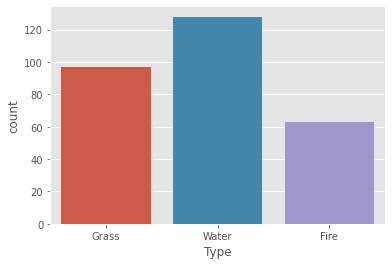

In [ ]:
sns.countplot(x = new.Type)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras as ks
from tensorflow.keras import layers

In [ ]:
#augmentation


train_datagen = ImageDataGenerator(rescale = 1/255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True,fill_mode = 'nearest', validation_split = 0.1)

train_generator = train_datagen.flow_from_dataframe(new, x_col = "filepath",y_col = "Type", target_size = (120,120), color_mode = 'rgba', class_mode = "categorical", batch_size = 32,shuffle = True, seed = 1, subset = "training")




Found 260 validated image filenames belonging to 3 classes.


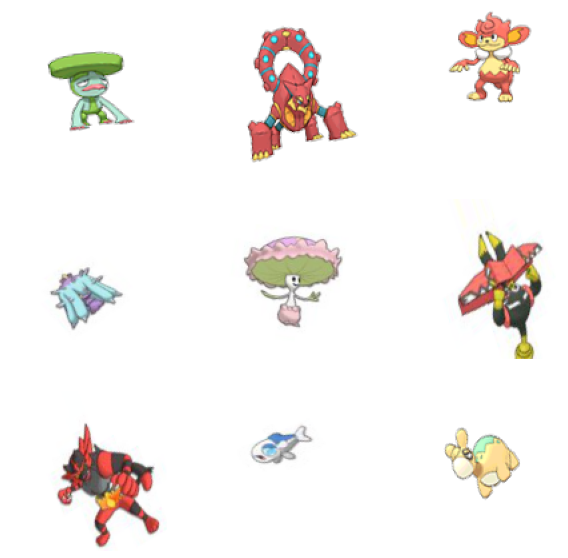

In [ ]:
image_sample = train_generator.next()[0]

plt.figure(figsize = (10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(image_sample[i,:,:,:])
  plt.axis('off')

In [ ]:


valid_generator = train_datagen.flow_from_dataframe(new, x_col = "filepath",y_col = "Type", target_size = (120,120), color_mode = 'rgba', class_mode = "categorical", batch_size = 4,shuffle = False, seed = 1, subset = "validation")

Found 28 validated image filenames belonging to 3 classes.


In [ ]:
# train_datagenerator = ImageDataGenerator(
#     featurewise_std_normalization=False,
#     samplewise_std_normalization=False,
#     rescale=1./255, 
#     rotation_range=40, 
#     width_shift_range=0.2, 
#     height_shift_range=0.2, 
#     shear_range=.2, 
#     zoom_range=0.2,
#     horizontal_flip=True, 
#     fill_mode='nearest',
#     validation_split=0.1)

# train_generator = train_datagenerator.flow_from_dataframe(
#     new, 
#     x_col='filepath', 
#     y_col='Type',
#     target_size=(120, 120), 
#     color_mode='rgba', 
#     class_mode='categorical', 
#     batch_size=32, 
#     shuffle=True, 
#     seed=1,
#     subset='training')
# validation_generator = train_datagenerator.flow_from_dataframe(
#     new , 
#     x_col='filepath',
#     y_col='Type',
#     target_size=(120, 120),
#     color_mode='rgba', 
#     class_mode='categorical', 
#     batch_size=4, 
#     shuffle=True,
#     seed=1, 
#     subset='validation'
# )

In [ ]:
class Resnet(tf.keras.model):
  def __init__(self,input_shape):
    super(Resnet,self).init()
    self.input = layers.Input(input_shape)
     

In [ ]:
#model
block = ResnetIdentityBlock(3,[8,16,32])


_ = block(tf.zeros([3, 8, 16, 32]))


model = ks.models.Sequential()

model.add(ks.layers.Dense(4,input_shape = (120,120,4)))
model.add(layers.Conv2D(filters = 64, kernel_size = (7,7), activation = "relu"))
model.add(layers.MaxPool2D(2,2))


model.add(layers.Conv2D(filters = 128, kernel_size = (7,7 ),  activation = "relu"))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(filters = 256, kernel_size = (7,7 ),  activation = "relu"))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(filters = 512, kernel_size = (7,7 ),  activation = "relu"))
model.add(layers.MaxPool2D(2,2))


model.add(layers.Flatten())
#model.add(layers.AveragePooling2D())
model.add(layers.Dense(1024,activation = "relu"))
model.add(layers.Dense(3,activation = "softmax"))



model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

ValueError: ignored

In [ ]:
block = ResnetIdentityBlock(3,[8,16,32])



block.layers
_ = block(tf.zeros([3, 8, 16, 32]))


#block.add(layers.AveragePooling2D())
#block.add(layers.Dense(50,activation = "relu"))
#block.add(layers.Dense(3,activation = "softmax"))

block.summary()

AttributeError: ignored

In [ ]:
# callback to stop training

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch, logs = {}):
    if(logs.get('acc')> 0.7) and logs.get('val_acc') > 0.7:
      print("\n reached 70% accuracy so stop training")
      self.model.stop_training = True


callbacks = myCallback()

In [ ]:
print(valid_generator)

Epoch 1/50


ValueError: ignored

In [ ]:
history = model.fit(train_generator, 
                    validation_data = valid_generator,
                    batch_size =20, 
                    epochs = 50
                    #callbacks = [tf.keras.callbacks.ReduceLROnPlateau(),callbacks]
                    
                    )

Epoch 1/50
9/9 [==============================] - 71s 9s/step - loss: 2.1764 - accuracy: 0.4000 - val_loss: 1.1142 - val_accuracy: 0.4286
Epoch 2/50
9/9 [==============================] - 69s 8s/step - loss: 1.0762 - accuracy: 0.4423 - val_loss: 1.0667 - val_accuracy: 0.4286
Epoch 3/50
9/9 [==============================] - 69s 8s/step - loss: 1.0825 - accuracy: 0.4500 - val_loss: 0.9733 - val_accuracy: 0.6071
Epoch 4/50
9/9 [==============================] - ETA: 0s - loss: 1.0717 - accuracy: 0.4462

KeyboardInterrupt: ignored